In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [2]:
PATH = "../../data/finals_all_0106"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [3]:
file_data = []
diff_means = []
diff_program_means_dict = {'none': [], 'windup': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -1")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
            diff_program_means_dict[data_in['program'][1]].append(mean)
    except:
        #print(data_in, file)
        pass
    file_data.append(data_in)
    
data = pd.concat(file_data)

In [4]:
data = data[data['complexity'] == 'default']

In [5]:
data['ete_upper'] = data['ete_upper'] / 1000
data['ete_lower'] = data['ete_lower'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.291,13.603,4.887,6.404
1,1,1,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.327,14.641,6.417,5.910
2,2,2,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.633,13.950,5.467,6.166
3,3,3,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.471,14.785,6.739,5.732
4,4,4,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.277,13.592,5.210,6.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,1821,wxpython,default,wxpython_default,small,5.0,windup,7.160,0.349,3.979,3.181
196,196,196,1821,wxpython,default,wxpython_default,small,5.0,windup,7.675,0.171,4.351,3.324
197,197,197,1821,wxpython,default,wxpython_default,small,5.0,windup,8.868,0.342,5.154,3.714
198,198,198,1821,wxpython,default,wxpython_default,small,5.0,windup,8.365,1.033,4.916,3.449


In [24]:
data_fullscreen = data[data['fullscreen'] == 'fullscreen']
data_no_fullscreen = data[data['fullscreen'] == 'no_fullscreen']

data = pd.concat([data_fullscreen, data_no_fullscreen])

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.291,13.603,4.887,6.404
1,1,1,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.327,14.641,6.417,5.910
2,2,2,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.633,13.950,5.467,6.166
3,3,3,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.471,14.785,6.739,5.732
4,4,4,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.277,13.592,5.210,6.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2323,wxpython,default,wxpython_default,no_fullscreen,2.0,windup,8.533,10.851,5.409,3.124
196,196,196,2323,wxpython,default,wxpython_default,no_fullscreen,2.0,windup,7.670,9.989,4.477,3.193
197,197,197,2323,wxpython,default,wxpython_default,no_fullscreen,2.0,windup,6.812,9.130,4.151,2.661
198,198,198,2323,wxpython,default,wxpython_default,no_fullscreen,2.0,windup,8.360,10.675,3.990,4.370


In [7]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(5, 15), "xtick.bottom": True, "grid.linestyle": ":"})

(0.0, 40.0)

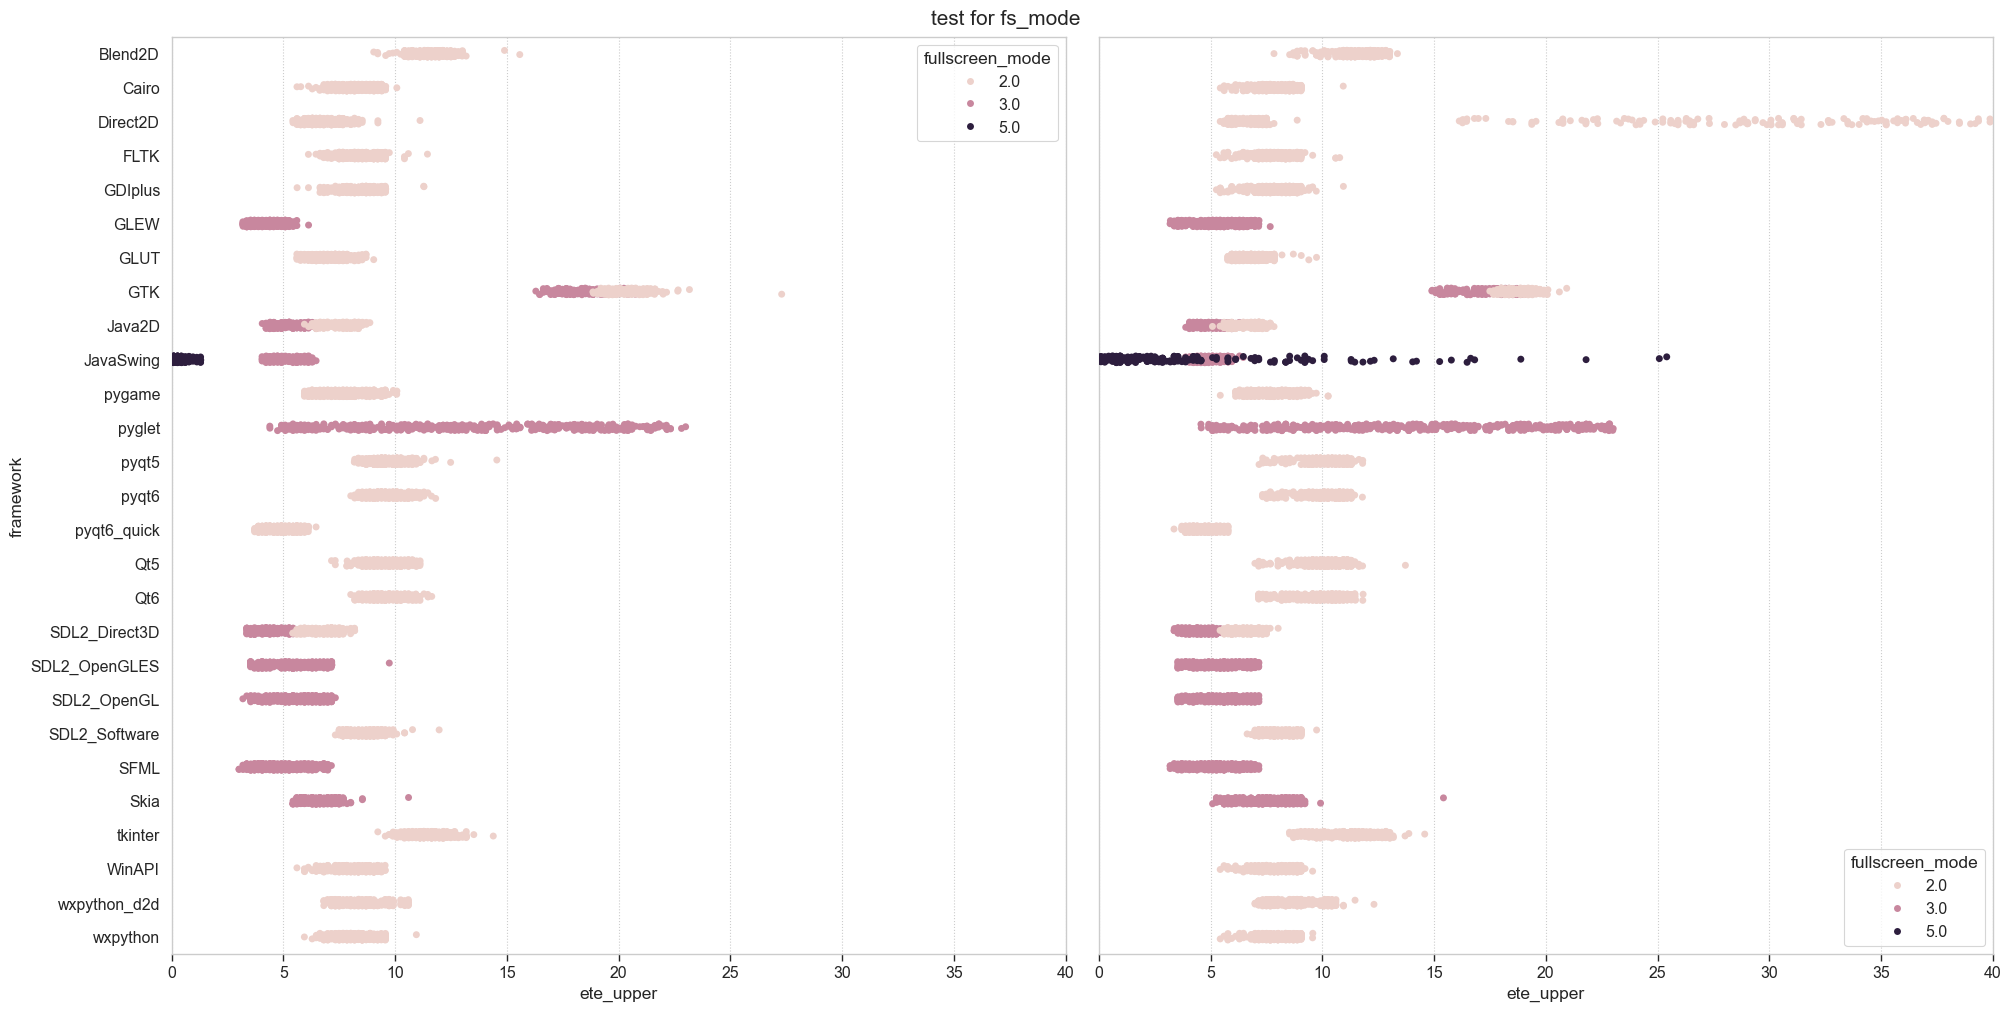

In [59]:
fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 10))
fig.suptitle("test for fs_mode")

plot = sns.stripplot(ax=axs[0], data=data[data['program'] == 'getpixel'], x='ete_upper', y='framework', hue='fullscreen_mode')
plot = sns.stripplot(ax=axs[1], data=data[data['program'] == 'windup'], x='ete_upper', y='framework', hue='fullscreen_mode')

plot.axes.set_xlim(0, 40)

In [50]:
filtered_frameworks = ['GTK', 'Java2D', 'JavaSwing', 'SDL2_Direct3D']

In [45]:
COLOR_HEIDENELKE = '#9C004B'
COLOR_GLUTROT = '#DA3C43'
COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppDa

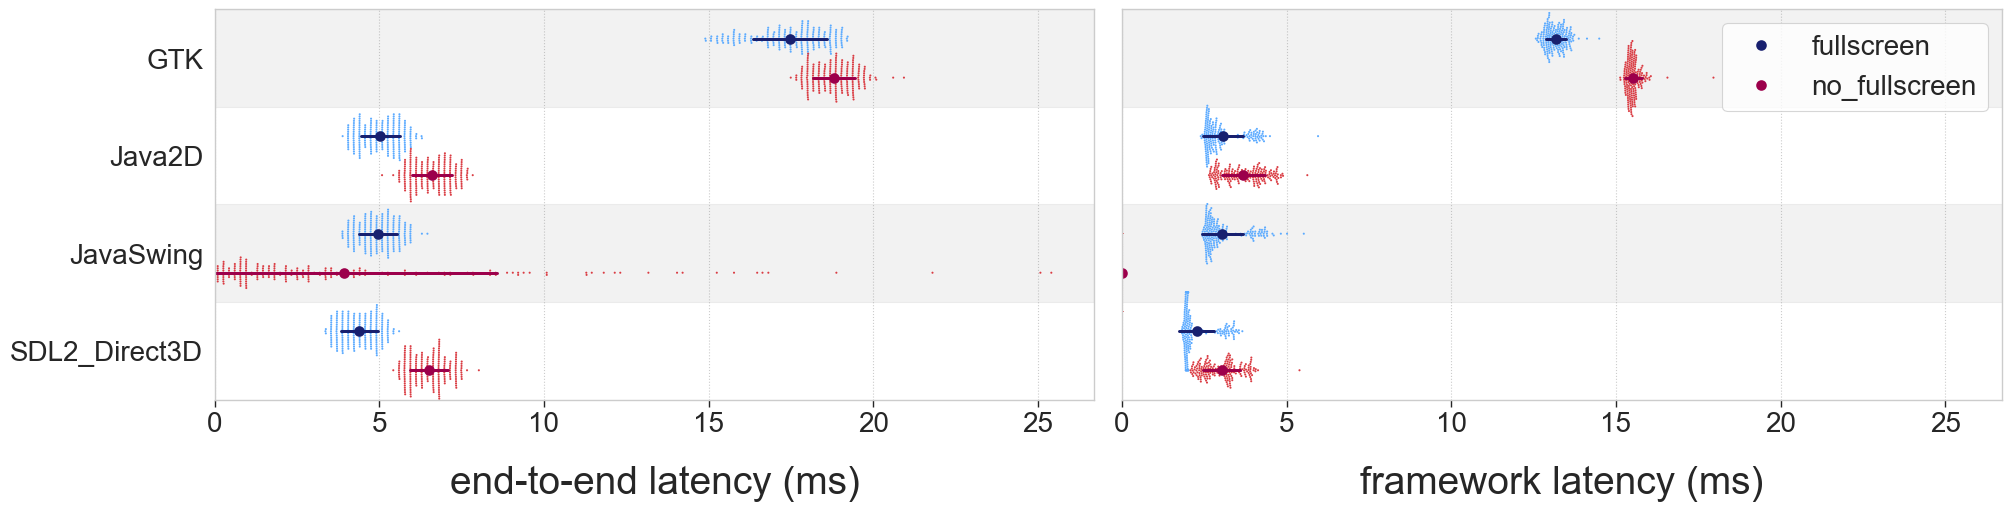

In [55]:
data_temp = data[data['fw'] < 500]  # ein ausreißer bei 8000 -> ignorieren
data_temp = data_temp[data_temp['ete_upper'] < 500]  # ein ausreißer bei 8000 -> ignorieren

data_temp = data_temp[data_temp['framework'].isin(filtered_frameworks)]

fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 5))
axs[0].tick_params(axis='both', labelsize=20)
axs[1].tick_params(axis='both', labelsize=20)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'windup'], x='ete_upper', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['fullscreen', 'no_fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data_temp[data_temp['program'] == 'windup'], x='fw', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['fullscreen', 'no_fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'windup'], x='ete_upper', y='framework', hue='fullscreen', hue_order=['fullscreen', 'no_fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[1], data=data_temp[data_temp['program'] == 'windup'], x='fw', y='framework', hue='fullscreen', hue_order=['fullscreen', 'no_fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
axs[1].set_xlabel('framework latency (ms)', fontsize=28)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

plt.legend(title='', fontsize=20, loc='upper right')

plt.savefig("point_swarm_fs_windup_high.pdf", format='pdf')

C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppDa

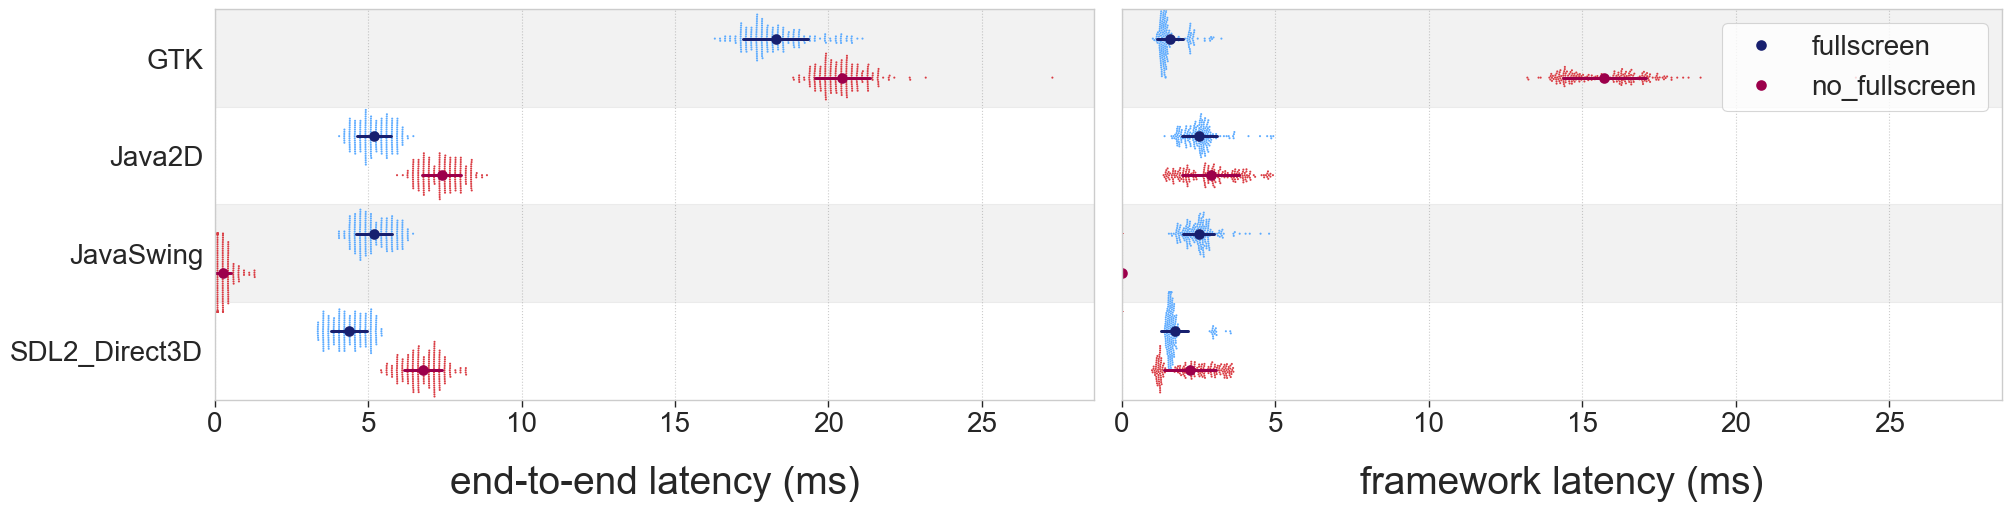

In [57]:
data_temp = data[data['fw'] < 500]  # ein ausreißer bei 8000 -> ignorieren
data_temp = data_temp[data_temp['ete_upper'] < 500]  # ein ausreißer bei 8000 -> ignorieren

data_temp = data_temp[data_temp['framework'].isin(filtered_frameworks)]

fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 5))
axs[0].tick_params(axis='both', labelsize=20)
axs[1].tick_params(axis='both', labelsize=20)

# stripped background
for i in range(len(data_temp['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
axs[0].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'getpixel'], x='ete_upper', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['fullscreen', 'no_fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data_temp[data_temp['program'] == 'getpixel'], x='fw', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['fullscreen', 'no_fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'getpixel'], x='ete_upper', y='framework', hue='fullscreen', hue_order=['fullscreen', 'no_fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[1], data=data_temp[data_temp['program'] == 'getpixel'], x='fw', y='framework', hue='fullscreen', hue_order=['fullscreen', 'no_fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
axs[1].set_xlabel('framework latency (ms)', fontsize=28)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

plt.legend(title='', fontsize=20, loc='upper right')

plt.savefig("point_swarm_fs_getpixel_high.pdf", format='pdf')

In [10]:
# getpixel
data_fullscreen_getpixel = data_fullscreen[data_fullscreen['program'] == 'getpixel']
data_no_fullscreen_getpixel = data_no_fullscreen[data_no_fullscreen['program'] == 'getpixel']

data_comparison_getpixel = pd.DataFrame(columns=['median_ete', 'std_ete', 'median_fw', 'std_fw'], index=['fullscreen', 'no_fullscreen'])

data_comparison_getpixel.at['fullscreen', 'median_ete'] = data_fullscreen_getpixel['ete_upper'].median()
data_comparison_getpixel.at['fullscreen', 'median_fw'] = data_fullscreen_getpixel['fw'].median()
data_comparison_getpixel.at['fullscreen', 'std_ete'] = data_fullscreen_getpixel['ete_upper'].std()
data_comparison_getpixel.at['fullscreen', 'std_fw'] = data_fullscreen_getpixel['fw'].std()

data_comparison_getpixel.at['no_fullscreen', 'median_ete'] = data_no_fullscreen_getpixel['ete_upper'].median()
data_comparison_getpixel.at['no_fullscreen', 'median_fw'] = data_no_fullscreen_getpixel['fw'].median()
data_comparison_getpixel.at['no_fullscreen', 'std_ete'] = data_no_fullscreen_getpixel['ete_upper'].std()
data_comparison_getpixel.at['no_fullscreen', 'std_fw'] = data_no_fullscreen_getpixel['fw'].std()

data_comparison_getpixel


,median_ete,std_ete,median_fw,std_fw
fullscreen,7.842,27.812608,2.619,1.625652
no_fullscreen,8.009,3.684155,2.8855,3.094261


In [11]:
# windup
data_fullscreen_windup = data_fullscreen[data_fullscreen['program'] == 'windup']
data_no_fullscreen_windup = data_no_fullscreen[data_no_fullscreen['program'] == 'windup']

data_comparison_windup = pd.DataFrame(columns=['median_ete', 'std_ete', 'median_fw', 'std_fw'], index=['fullscreen', 'no_fullscreen'])

data_comparison_windup.at['fullscreen', 'median_ete'] = data_fullscreen_windup['ete_upper'].median()
data_comparison_windup.at['fullscreen', 'median_fw'] = data_fullscreen_windup['fw'].median()
data_comparison_windup.at['fullscreen', 'std_ete'] = data_fullscreen_windup['ete_upper'].std()
data_comparison_windup.at['fullscreen', 'std_fw'] = data_fullscreen_windup['fw'].std()

data_comparison_windup.at['no_fullscreen', 'median_ete'] = data_no_fullscreen_windup['ete_upper'].median()
data_comparison_windup.at['no_fullscreen', 'median_fw'] = data_no_fullscreen_windup['fw'].median()
data_comparison_windup.at['no_fullscreen', 'std_ete'] = data_no_fullscreen_windup['ete_upper'].std()
data_comparison_windup.at['no_fullscreen', 'std_fw'] = data_no_fullscreen_windup['fw'].std()

data_comparison_windup

,median_ete,std_ete,median_fw,std_fw
fullscreen,7.843,6.231688,4.464,124.315361
no_fullscreen,7.835,3.380764,4.62,109.147325
